In [215]:
%matplotlib inline
import pandas_profiling
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [12, 5]
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.facecolor'] = 'white'
import pandas
pandas.options.display.max_columns = 999
from datetime import datetime

In [216]:
now = pandas.Timestamp(datetime.now())

In [263]:
df_simple = pandas.read_csv("../results_with_coverage.csv", parse_dates=[0,10])
df_googleplay = pandas.read_csv("../googleplay.csv", index_col='package')
df = df_simple.join(df_googleplay, on="app_id")



In [264]:
df.head()

,last_updated,github_link,user,project_name,app_id,category,stars,contributors,commits,forks,created_at,androidviewclient,appium,calabash,espresso,monkeyrunner,pythonuiautomator,robotium,uiautomator,projectquantum,qmetry,saucelabs,firebase,perfecto,bitbar,travis,circleci,codeship,codefresh,junit,androidjunitrunner,roboelectric,robospock,coveralls,codecov,rating_value,rating_count,downloads
0,2017-08-28,https://github.com/yeriomin/YalpStore,yeriomin,YalpStore,com.github.yeriomin.yalpstore,System,354,9,796,27,2016-12-11,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN
1,2017-08-28,https://github.com/subchannel13/EnchantedFortress,subchannel13,EnchantedFortress,hr.kravarscan.enchantedfortress,Games,12,2,73,3,2017-05-21,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,NaN,NaN,NaN,NaN,NaN
2,2017-08-28,https://github.com/rdoeffinger/Dictionary,rdoeffinger,Dictionary,de.reimardoeffinger.quickdic,Reading,54,11,572,22,2015-08-19,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,NaN,NaN,4.663812,467.0,"10,000 - 50,000"
3,2017-08-28,https://github.com/meefik/busybox,meefik,busybox,ru.meefik.busybox,System,146,7,86,42,2015-10-04,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,NaN,NaN,4.511925,4067.0,"500,000 - 1,000,000"
4,2017-08-28,https://github.com/hwki/SimpleBitcoinWidget,hwki,SimpleBitcoinWidget,com.brentpanther.litecoinwidget,Money,28,5,81,23,2013-03-24,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,NaN,NaN,4.481482,27.0,"1,000 - 5,000"


In [265]:
pandas_profiling.ProfileReport(df)

Number of variables,38
Number of observations,1000
Total Missing (%),5.5%
Total size in memory,146.6 KiB
Average record size in memory,150.1 B
Numeric,18
Categorical,5
Date,2
Text (Unique),1
Rejected,12
Distinct count,2


In [266]:
df.dtypes


last_updated          datetime64[ns]
github_link                   object
user                          object
project_name                  object
app_id                        object
category                      object
stars                          int64
contributors                   int64
commits                        int64
forks                          int64
created_at            datetime64[ns]
androidviewclient               bool
appium                          bool
calabash                        bool
espresso                        bool
monkeyrunner                    bool
pythonuiautomator               bool
robotium                        bool
uiautomator                     bool
projectquantum                  bool
qmetry                          bool
saucelabs                       bool
firebase                        bool
perfecto                        bool
bitbar                          bool
travis                          bool
circleci                        bool
c

In [267]:
ui_automation_frameworks = [
    "androidviewclient",
    'appium',
    'calabash',
    'espresso',
    'monkeyrunner',
    'pythonuiautomator',
    'robotium',
    'uiautomator',
]

cloud_test_services = [
    'projectquantum',
    'qmetry',
    'saucelabs',
    'firebase',
    'perfecto',
    'bitbar',
]

unit_test_frameworks = [
    'junit',
    'androidjunitrunner',
    'roboelectric',
    'robospock',
]

ci_services = [
    'travis',
    'circleci',
    'codeship',
    'codefresh',
]

# Projects with tests

In [268]:
df['tests'] = df[unit_test_frameworks+ui_automation_frameworks+cloud_test_services].any(axis=1)
projects_with_tests = df['tests'].sum()
total_projects = len(df.index)
print("{} out of {} projects ({:.0%}).".format(projects_with_tests, total_projects, projects_with_tests/total_projects))

406 out of 1000 projects (41%).


# Projects with unit tests

In [269]:
df['unit_tests'] = df[unit_test_frameworks].apply(any, axis=1)
projects_with_unit_tests = df['unit_tests'].sum()
print("{} out of {} projects ({:.0%}).".format(projects_with_unit_tests, total_projects, projects_with_unit_tests/total_projects))

392 out of 1000 projects (39%).


# Projects using UI tests

In [270]:
df['ui_tests'] = df[ui_automation_frameworks].apply(any, axis=1)
projects_with_ui_tests = df['ui_tests'].sum()
print("{} out of {} projects ({:.0%}).".format(projects_with_ui_tests, total_projects, projects_with_ui_tests/total_projects))
df['espresso'].sum()

154 out of 1000 projects (15%).


149

# Projects using cloud test services

In [271]:
df["cloud_tests"] = df[cloud_test_services].apply(any, axis=1)
projects_with_cloud_tests = df["cloud_tests"].sum()
print("{} out of {} projects ({:.1%}).".format(projects_with_cloud_tests, total_projects, projects_with_cloud_tests/total_projects))
df["firebase"].sum()


29 out of 1000 projects (2.9%).


28

# Projects using cloud test services

In [272]:
df["ci"] = df[ci_services].apply(any, axis=1)
projects_with_ci = df["ci"].sum()
print("{} out of {} projects ({:.0%}).".format(projects_with_ci, total_projects, projects_with_ci/total_projects))



263 out of 1000 projects (26%).


(<matplotlib.figure.Figure at 0x1124176d8>,
 OrderedDict([(('False', 'True'),
               (0.0, 0.0, 0.591044776119403, 0.1946374039397295)),
              (('False', 'False'),
               (0.0,
                0.19795966307594212,
                0.591044776119403,
                0.80204033692405774)),
              (('True', 'True'),
               (0.5960199004975125,
                0.0,
                0.40398009950248764,
                0.36086607858861264)),
              (('True', 'False'),
               (0.5960199004975125,
                0.36418833772482528,
                0.40398009950248764,
                0.63581166227517472))]))

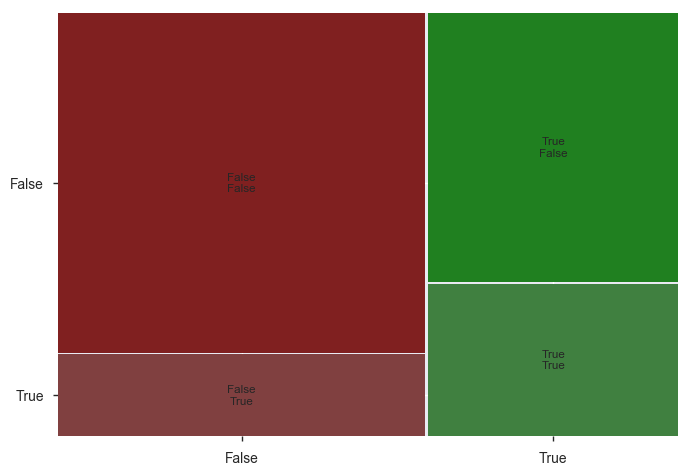

In [273]:
from statsmodels.graphics.mosaicplot import mosaic
mosaic(df, ["tests", "ci"])
# NOTE: colors can be avg of stars, contributors, etc.

# Number of projects by framework

In [195]:
colors_dict = {
    'any': 'C0',
    'unit_test_frameworks': 'C1',
    'ui_automation_frameworks': 'C2',
    'cloud_test_services': 'C3',
    'ci_services': 'C4',
}


In [127]:

ax2.get_yticks()[2]/3

33.333333333333336

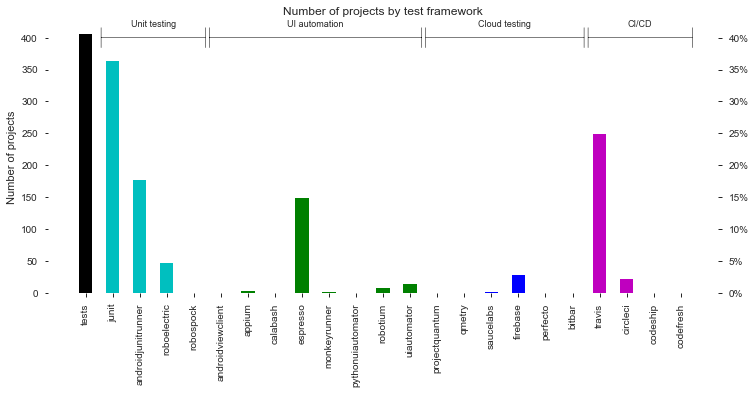

In [129]:
columns = ['tests'] + unit_test_frameworks+ui_automation_frameworks+cloud_test_services+ci_services
colors =  (
    ['k'] +
    ['c'] * len(unit_test_frameworks) 
    + ['g'] * len(ui_automation_frameworks)
    + ['b'] * len(cloud_test_services)
    + ['m'] * len(ci_services) 
)

sums = df[columns].sum()
labels = sums.index
heights = sums.values
figure, ax = plt.subplots(1, 1)

ax.bar(range(len(labels)), heights, 0.5, color=colors)
ax.grid(False)
ax.set_xticklabels(labels, rotation='vertical')
ax.set_xticks(range(len(labels)))
ax.tick_params(direction='out')
ax.set_title("Number of projects by test framework")
ax.set_ylabel("Number of projects")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.yaxis.grid(linestyle='dotted', color='black')

ax2 = ax.twinx()
ax2.grid(False)
ax2.set_ylim(ax.get_ylim())
ax2.set_yticklabels(["{:.0%}".format(tick/len(df)) for tick in ax2.get_yticks()])


def draw_range(ax, xmin, xmax, label):
    y=400
    ax.annotate('', xy=(xmin, y), xytext=(xmax, y), xycoords='data', textcoords='data',
                arrowprops={'arrowstyle': '|-|', 'color':'black', 'linewidth': 0.5})
    xcenter = xmin + (xmax-xmin)/2
    ytext = y + ( ax.get_ylim()[1] - ax.get_ylim()[0] ) / 20
    ax.annotate(label, xy=(xcenter,ytext), ha='center', va='center', fontsize=9)

draw_range(ax, 0.5, 4.5, "Unit testing")
draw_range(ax, 4.5, 12.5, "UI automation")
draw_range(ax, 12.5, 18.5, "Cloud testing")
draw_range(ax, 18.5, 22.5, "CI/CD")

In [21]:
df[df['firebase']]

,last_updated,github_link,user,project_name,app_id,category,stars,contributors,commits,forks,created_at,androidviewclient,appium,calabash,espresso,monkeyrunner,pythonuiautomator,robotium,uiautomator,projectquantum,qmetry,saucelabs,firebase,perfecto,bitbar,travis,circleci,codeship,codefresh,junit,androidjunitrunner,roboelectric,robospock,coveralls,codecov,rating_value,rating_count,downloads,tests,ui_tests,cloud_tests
24,2017-08-23,https://github.com/nextcloud/android,nextcloud,android,com.nextcloud.android.beta,Internet,388,70,8589,204,2016-06-06,False,True,False,True,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,True,False,False,NaN,NaN,NaN,NaN,NaN,True,True,True
69,2017-08-15,https://github.com/osmandapp/Osmand,osmandapp,Osmand,net.osmand.plus,Navigation,1187,337,41403,574,2011-01-15,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,NaN,NaN,4.353432,14396.0,"100,000 - 500,000",True,False,True
79,2017-08-14,https://github.com/vector-im/riot-android,vector-im,riot-android,im.vector.alpha,Internet,423,49,3556,147,2015-12-17,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,NaN,NaN,4.593291,477.0,"10,000 - 50,000",True,False,True
113,2017-08-07,https://github.com/Vavassor/Tusky,Vavassor,Tusky,com.keylesspalace.tusky,Internet,262,35,779,68,2017-01-02,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,True,False,False,NaN,NaN,3.645022,462.0,"50,000 - 100,000",True,True,True
119,2017-08-02,https://github.com/ligi/SurvivalManual,ligi,SurvivalManual,org.ligi.survivalmanual,Reading,241,3,277,42,2016-09-16,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,True,False,False,NaN,NaN,4.691781,10804.0,"1,000,000 - 5,000,000",True,True,True
158,2017-07-18,https://github.com/walleth/walleth,walleth,walleth,org.walleth,Money,67,5,283,15,2017-05-01,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,NaN,NaN,4.090909,11.0,"1,000 - 5,000",True,True,True
175,2017-07-14,https://github.com/romannurik/muzei,romannurik,muzei,net.nurik.roman.muzei,Multimedia,3277,19,1041,809,2014-02-06,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,NaN,NaN,4.365925,47906.0,"1,000,000 - 5,000,000",True,False,True
180,2017-07-14,https://github.com/ligi/MaterialTeaTimer,ligi,MaterialTeaTimer,org.ligi.materialteatimer,Time,11,3,84,9,2016-10-15,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,True,False,False,NaN,NaN,4.187500,16.0,"1,000 - 5,000",True,False,True
193,2017-07-09,https://github.com/michaelkourlas/voipms-sms-c...,michaelkourlas,voipms-sms-client,net.kourlas.voipms_sms,Phone & SMS,67,2,231,26,2014-09-20,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,NaN,NaN,4.543933,239.0,"10,000 - 50,000",True,False,True
214,2017-06-28,https://github.com/bottiger/SoundWaves,bottiger,SoundWaves,org.bottiger.podcast,Multimedia,93,6,2291,9,2012-07-18,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,True,False,False,NaN,NaN,4.159091,88.0,"10,000 - 50,000",True,True,True


------
## Conjecture
----

### Unit test
_JUnit_ is with no doubt the most used framework.
This can be explained by the fact that Google recommends _Junit_ for unit tests.

In addition, other Android testing tools developed by Google (e.g., Espresso, and UIAuomator) rely on _JUnit_ for the creation of tests.

AndroidJunitRunnner is also very popular, since it allows to run unit tests on the device.
This is the tool developed and recommended by Google and it is used not only for unit testing but also for other Google instrumentation frameworks.

### UI tests

Espresso is the clear winner.
The main reasons for this probably rely on the fact that Google Docs and Tutorials for Android tests first introduce Espresso. 
One strong feature of Espresso is the fact that it only manipulates and asserts on the application UI while it is at rest. This is very handy and makes the creation of tests a lot easier, since other frameworks require using wait and poll mechanisms.

### Cloud test services

Cloud test services are still very shy in the OSS world of Android apps. Only 3% (29 out of 1000) of apps use it.
Google Firebase is the most popular, followed by Saucelabs. None of the other frameworks are being used by the the apps in this study.

-----


In [138]:
df['age'] = (now - df['created_at'])
df['age_numeric'] = (now - df['created_at']).astype('<m8[Y]').astype('int')
df['time_since_last_update'] = (now - df['last_updated'])
df['time_since_last_update_numeric'] = df['time_since_last_update'].astype('<m8[Y]').astype('int')

# Distribution of Age

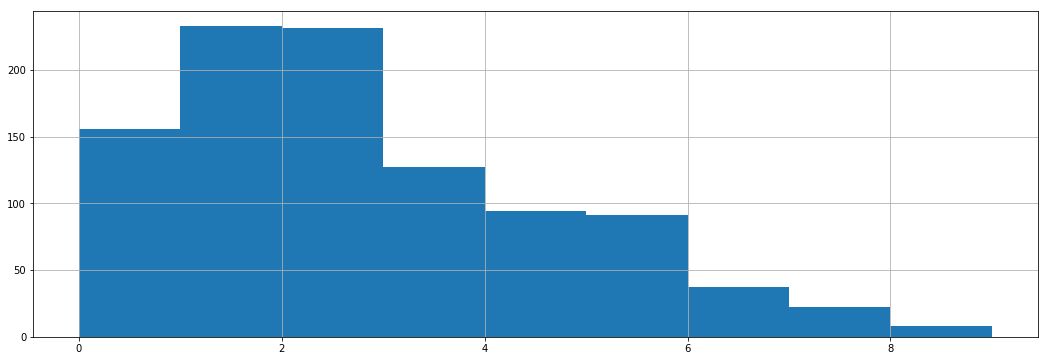

In [23]:
df['age_numeric'].hist(bins=9)

In [24]:
df['age'].describe()

count                         1000
mean     1042 days 11:40:31.850637
std       673 days 11:56:35.891598
min        41 days 11:21:48.650637
25%       538 days 05:21:48.650637
50%       911 days 11:21:48.650636
75%      1465 days 11:21:48.650636
max      3342 days 11:21:48.650637
Name: age, dtype: object

# Tests in projects by time since creation

In [191]:
def tests_in_projects_by_time_of_creation(df_projects, frameworks, label=None,
                                          title=None,
                                          zorder=1,
                                          color=None,
                                          verbose=False):
    portions = []
    n_projects_with_tests_history = []
    total_projects_history = []
    age_max = df_projects['age_numeric'].max()+1
    for age in range(age_max):
        n_projects_with_tests = df_projects[df_projects['age_numeric']==age][frameworks].apply(any, axis=1).sum()
        n_projects_with_tests_history.append(n_projects_with_tests)
        total_projects = len(df_projects[df_projects['age_numeric']==age].index)
        total_projects_history.append(total_projects)
        if total_projects == 0:
            portion = 0
        else:
            portion = n_projects_with_tests/total_projects
        portions.append(portion)
        if verbose:
            print("Age {}:".format(age))
            print("{} out of {} projects ({:.1%}).".format(n_projects_with_tests, total_projects, portion))
            
    plt.plot(range(age_max), portions, label=label, zorder=zorder, color=color)
    plt.scatter(range(age_max), portions, total_projects_history, marker='o', linewidth='1', zorder=zorder, color=color)
    ax = plt.gca()
    ax.set_xticks(range(age_max))
    ax.set_yticklabels(["{:.0%}".format(label) for label in ax.get_yticks()])
    ax.set_ylabel("Percentage of projects")
    ax.yaxis.grid(linestyle='dotted', color='gray')
    if label:
        legend = ax.legend(loc='upper center', shadow=True)
    if title:
        ax.set_title(title)

In [192]:
df[df['age_numeric']==df['age_numeric'].max()]

,last_updated,github_link,user,project_name,app_id,category,stars,contributors,commits,forks,created_at,androidviewclient,appium,calabash,espresso,monkeyrunner,pythonuiautomator,robotium,uiautomator,projectquantum,qmetry,saucelabs,firebase,perfecto,bitbar,travis,circleci,codeship,codefresh,junit,androidjunitrunner,roboelectric,robospock,coveralls,codecov,rating_value,rating_count,downloads,tests,unit_tests,ui_tests,cloud_tests,ci,age,age_numeric,time_since_last_update,time_since_last_update_numeric
921,2015-09-17,https://github.com/dbravender/korean_conjugation,dbravender,korean_conjugation,us.bravender.android.dongsa,Science & Education,43,2,572,15,2008-07-26,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,NaN,NaN,4.537445,454.0,"10,000 - 50,000",False,False,False,False,False,3345 days 08:48:01.846889,9,736 days 08:48:01.846889,2


Age 0:
103 out of 156 projects (66.0%).
Age 1:
138 out of 233 projects (59.2%).
Age 2:
56 out of 229 projects (24.5%).
Age 3:
34 out of 130 projects (26.2%).
Age 4:
29 out of 92 projects (31.5%).
Age 5:
31 out of 93 projects (33.3%).
Age 6:
10 out of 37 projects (27.0%).
Age 7:
4 out of 22 projects (18.2%).
Age 8:
1 out of 7 projects (14.3%).
Age 9:
0 out of 1 projects (0.0%).


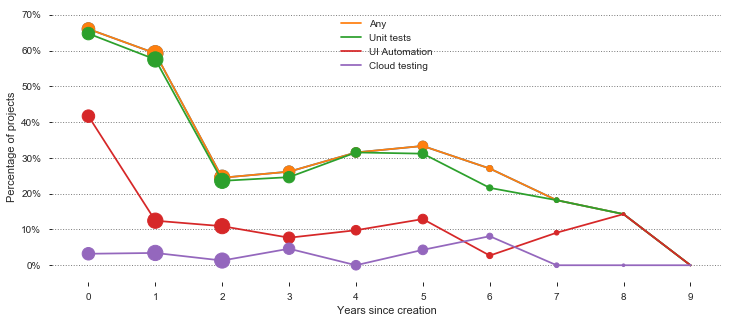

In [193]:
tests_in_projects_by_time_of_creation(df, unit_test_frameworks+ui_automation_frameworks+cloud_test_services,
                                      verbose=True, zorder=1)

tests_in_projects_by_time_of_creation(df, unit_test_frameworks+ui_automation_frameworks+cloud_test_services, label="Any", zorder=2)
tests_in_projects_by_time_of_creation(df, unit_test_frameworks, label="Unit tests", zorder=3)
tests_in_projects_by_time_of_creation(df, ui_automation_frameworks, label="UI Automation", zorder=4)
tests_in_projects_by_time_of_creation(df, cloud_test_services, label="Cloud testing", zorder=5, color=color)
ax = plt.gca()
ax.set_xlabel("Years since creation")

------
## Conjecture
----

There is an increasing trend of test usage in Android apps.
Most projects with less than 2 years are using automated tests.
In addition UI automation has became popular in the last year.
Two considerations can be taken from this trend:

1. Test for Android apps are becoming more popular. Either because more tools are available or developers are more aware of the importance of using automated tests in their apps.

2. Projects have tests at the begining of the project, but as soons as they get more mature and complex, tests easily become obsolete and are difficult to maintain. Hence, tests tend to be removed from these projects.

This last conjecture is very unlikely, since one could expect that some of these tests are simple or cover a stable part of the app's core, and thus could be kept in the project. Anyhow, we further analyse this data by restinging it to projects that were created before 2 years ago.

Another conclusion from this visualization is that most projects that use UI automation also use unit test frameworks.

----

In [23]:
((df['age'].dt.total_seconds()/3600/24/365)<1).sum()

163

# Active projects

**Projects that had an update in the last year**

In [25]:
df_active = df[df['time_since_last_update'].dt.total_seconds()/(3600*24*365) < 1]
print("Total projects updated within last year: {}.".format(len(df_active.index)))


Total projects updated within last year: 662.


# Tests in projects by time since creation (only for active projects)

Only considered projects that had an update in the last year.

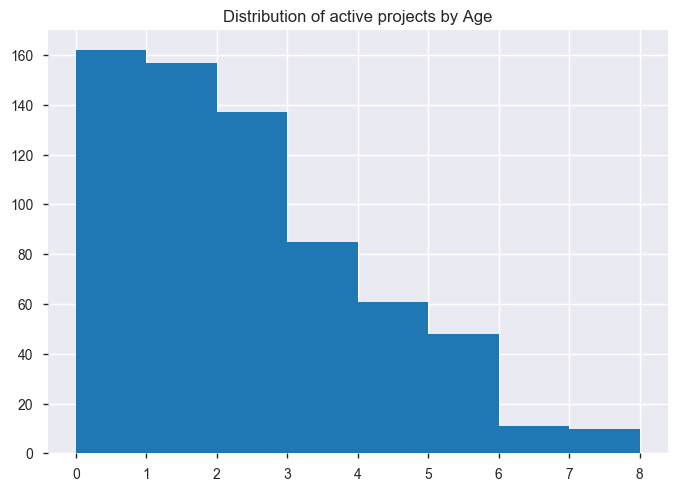

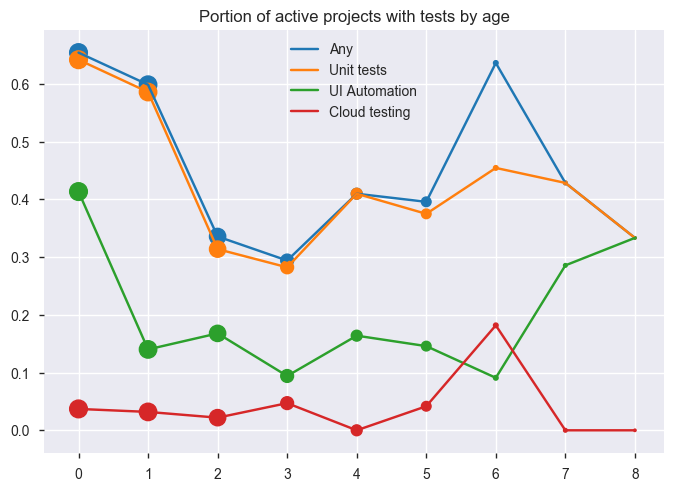

In [25]:
plt.title("Distribution of active projects by Age")
df_active.age_numeric.hist(bins=8)
# fig, (ax1, ax2, ax3) = plt.subplots(1,3)
plt.figure()
tests_in_projects_by_time_of_creation(df_active, unit_test_frameworks+ui_automation_frameworks+cloud_test_services, label="Any")
tests_in_projects_by_time_of_creation(df_active, unit_test_frameworks, label="Unit tests")
tests_in_projects_by_time_of_creation(df_active, ui_automation_frameworks, label="UI Automation")
tests_in_projects_by_time_of_creation(df_active, cloud_test_services, label="Cloud testing")
plt.title("Portion of active projects with tests by age")

# Projects that use cloud testing services

In [26]:
df_cloud = df[df[cloud_test_services].any(axis='columns')]

In [153]:
print("Total projects using cloud services: {}".format(len(df_cloud)))

Total projects using cloud services: 29


In [154]:
df_cloud

,last_updated,github_link,user,project_name,app_id,category,stars,contributors,commits,forks,created_at,androidviewclient,appium,calabash,espresso,monkeyrunner,pythonuiautomator,robotium,uiautomator,projectquantum,qmetry,saucelabs,firebase,perfecto,bitbar,junit,androidjunitrunner,roboelectric,robospock,rating_value,rating_count,downloads,tests,ui_tests,cloud_tests
24,2017-08-23,https://github.com/nextcloud/android,nextcloud,android,com.nextcloud.android.beta,Internet,388,70,8589,204,2016-06-06,False,True,False,True,False,False,False,True,False,False,False,True,False,False,True,True,False,False,NaN,NaN,NaN,True,True,True
69,2017-08-15,https://github.com/osmandapp/Osmand,osmandapp,Osmand,net.osmand.plus,Navigation,1187,337,41403,574,2011-01-15,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,4.353432,14396.0,"100,000 - 500,000",True,False,True
79,2017-08-14,https://github.com/vector-im/riot-android,vector-im,riot-android,im.vector.alpha,Internet,423,49,3556,147,2015-12-17,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,4.593291,477.0,"10,000 - 50,000",True,False,True
113,2017-08-07,https://github.com/Vavassor/Tusky,Vavassor,Tusky,com.keylesspalace.tusky,Internet,262,35,779,68,2017-01-02,False,False,False,True,False,False,False,False,False,False,False,True,False,False,True,True,False,False,3.645022,462.0,"50,000 - 100,000",True,True,True
119,2017-08-02,https://github.com/ligi/SurvivalManual,ligi,SurvivalManual,org.ligi.survivalmanual,Reading,241,3,277,42,2016-09-16,False,False,False,True,False,False,False,False,False,False,False,True,False,False,True,True,False,False,4.691781,10804.0,"1,000,000 - 5,000,000",True,True,True
158,2017-07-18,https://github.com/walleth/walleth,walleth,walleth,org.walleth,Money,67,5,283,15,2017-05-01,False,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False,False,4.090909,11.0,"1,000 - 5,000",True,True,True
175,2017-07-14,https://github.com/romannurik/muzei,romannurik,muzei,net.nurik.roman.muzei,Multimedia,3277,19,1041,809,2014-02-06,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,4.365925,47906.0,"1,000,000 - 5,000,000",True,False,True
180,2017-07-14,https://github.com/ligi/MaterialTeaTimer,ligi,MaterialTeaTimer,org.ligi.materialteatimer,Time,11,3,84,9,2016-10-15,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,True,False,False,4.187500,16.0,"1,000 - 5,000",True,False,True
193,2017-07-09,https://github.com/michaelkourlas/voipms-sms-c...,michaelkourlas,voipms-sms-client,net.kourlas.voipms_sms,Phone & SMS,67,2,231,26,2014-09-20,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,4.543933,239.0,"10,000 - 50,000",True,False,True
214,2017-06-28,https://github.com/bottiger/SoundWaves,bottiger,SoundWaves,org.bottiger.podcast,Multimedia,93,6,2291,9,2012-07-18,False,False,False,True,False,False,False,False,False,False,False,True,False,False,True,True,False,False,4.159091,88.0,"10,000 - 50,000",True,True,True


### Projects that use cloud services but no other test framework: 

In [27]:
df_cloud_wo_ui = df_cloud[ui_automation_frameworks+unit_test_frameworks].any(axis=1)==False
print("Total Projects: {}".format(df_cloud_wo_ui.sum()))
df_cloud[df_cloud_wo_ui]

Total Projects: 8


,last_updated,github_link,user,project_name,app_id,category,stars,contributors,commits,forks,created_at,androidviewclient,appium,calabash,espresso,monkeyrunner,pythonuiautomator,robotium,uiautomator,projectquantum,qmetry,saucelabs,firebase,perfecto,bitbar,travis,circleci,codeship,codefresh,junit,androidjunitrunner,roboelectric,robospock,coveralls,codecov,rating_value,rating_count,downloads,tests,ui_tests,cloud_tests,age,age_numeric,time_since_last_update,time_since_last_update_numeric
69,2017-08-15,https://github.com/osmandapp/Osmand,osmandapp,Osmand,net.osmand.plus,Navigation,1187,337,41403,574,2011-01-15,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,NaN,NaN,4.353432,14396.0,"100,000 - 500,000",True,False,True,2439 days 11:21:48.650637,6,35 days 11:21:48.650637,0
79,2017-08-14,https://github.com/vector-im/riot-android,vector-im,riot-android,im.vector.alpha,Internet,423,49,3556,147,2015-12-17,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,NaN,NaN,4.593291,477.0,"10,000 - 50,000",True,False,True,642 days 11:21:48.650637,1,36 days 11:21:48.650637,0
175,2017-07-14,https://github.com/romannurik/muzei,romannurik,muzei,net.nurik.roman.muzei,Multimedia,3277,19,1041,809,2014-02-06,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,NaN,NaN,4.365925,47906.0,"1,000,000 - 5,000,000",True,False,True,1321 days 11:21:48.650637,3,67 days 11:21:48.650637,0
193,2017-07-09,https://github.com/michaelkourlas/voipms-sms-c...,michaelkourlas,voipms-sms-client,net.kourlas.voipms_sms,Phone & SMS,67,2,231,26,2014-09-20,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,NaN,NaN,4.543933,239.0,"10,000 - 50,000",True,False,True,1095 days 11:21:48.650637,2,72 days 11:21:48.650637,0
573,2016-11-21,https://github.com/khertan/ForRunners,khertan,ForRunners,net.khertan.forrunners,Sports & Health,38,5,182,19,2015-10-10,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,NaN,NaN,4.272727,22.0,"500 - 1,000",True,False,True,710 days 11:21:48.650637,1,302 days 11:21:48.650637,0
644,2016-10-04,https://github.com/ybonnel/TransportsRennes,ybonnel,TransportsRennes,fr.ybo.transportsbordeaux,Navigation,42,3,1291,15,2010-12-17,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,NaN,NaN,4.498146,1618.0,"50,000 - 100,000",True,False,True,2468 days 11:21:48.650637,6,350 days 11:21:48.650637,0
698,2016-08-06,https://github.com/M66B/NetGuard,M66B,NetGuard,eu.faircode.netguard,Security,1149,25,3012,271,2015-10-24,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,NaN,NaN,4.234281,5630.0,"500,000 - 1,000,000",True,False,True,696 days 11:21:48.650637,1,409 days 11:21:48.650637,1
718,2016-07-08,https://github.com/Andre1299/TUI-ConsoleLauncher,Andre1299,TUI-ConsoleLauncher,ohi.andre.consolelauncher,System,209,2,123,63,2016-05-11,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,NaN,NaN,4.684715,6150.0,"100,000 - 500,000",True,False,True,496 days 11:21:48.650637,1,438 days 11:21:48.650637,1



# Projects that started 2 years ago by date time since last update

In [174]:
df_old = df[df['age_numeric']>=2]

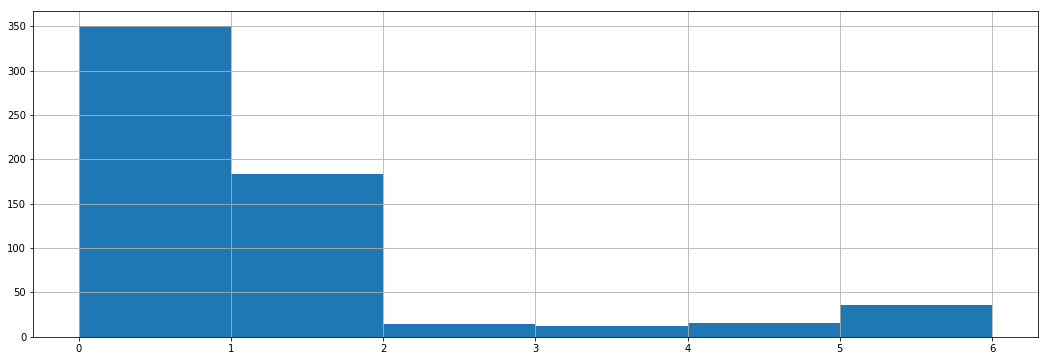

In [29]:
df_old['time_since_last_update_numeric'].hist(bins=6)

In [206]:
def tests_in_projects_by_time_of_update(df_projects, frameworks, label=None,
                                          title=None,
                                          verbose=False, zorder=None, color=None):
    portions = []
    n_projects_with_tests_history = []
    total_projects_history = []
    age_max = df_projects['time_since_last_update_numeric'].max()+1
    for age in range(age_max):
        n_projects_with_tests = df_projects[df_projects['time_since_last_update_numeric']==age][frameworks].apply(any, axis=1).sum()
        n_projects_with_tests_history.append(n_projects_with_tests)
        total_projects = len(df_projects[df_projects['time_since_last_update_numeric']==age].index)
        total_projects_history.append(total_projects)
        if total_projects == 0:
            portion = 0
        else:
            portion = n_projects_with_tests/total_projects
        portions.append(portion)
        if verbose:
            print("Age {}:".format(age))
            print("{} out of {} projects ({:.1%}).".format(n_projects_with_tests, total_projects, portion))
    
    plt.plot(range(age_max), portions, label=label, zorder=zorder)
    plt.scatter(range(age_max), portions, total_projects_history, marker='o', linewidth='1', zorder=zorder)
    ax = plt.gca()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(True)
    ax.set_xticks(range(age_max))
    ax.set_yticklabels(["{:.0%}".format(label) for label in ax.get_yticks()])
    ax.set_ylabel("Percentage of projects")
    ax.yaxis.grid(linestyle='dotted', color='gray')

    if label:
        legend = ax.legend(loc='upper center', shadow=False)
    if title:
        plt.title(title)

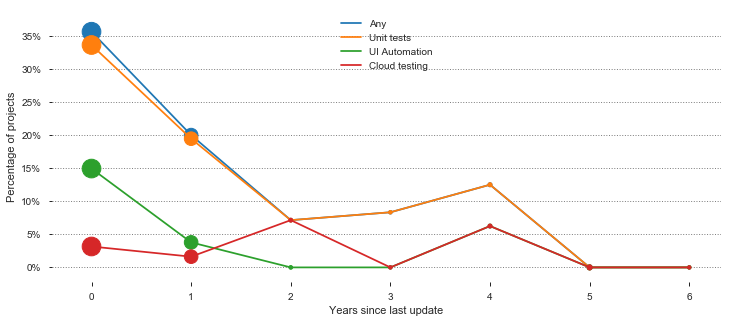

In [207]:
tests_in_projects_by_time_of_update(df_old, unit_test_frameworks+ui_automation_frameworks+cloud_test_services, label="Any", color=colors_dict['any'], zorder=1)
tests_in_projects_by_time_of_update(df_old, unit_test_frameworks, label="Unit tests", color=colors_dict['unit_test_frameworks'], zorder=2)
tests_in_projects_by_time_of_update(df_old, ui_automation_frameworks, label="UI Automation", color=colors_dict['ui_automation_frameworks'], zorder=3)
tests_in_projects_by_time_of_update(df_old, cloud_test_services, label="Cloud testing", color=colors_dict['cloud_test_services'], zorder=4)
ax = plt.gca()
ax.set_xlabel("Years since last update")

------
## Conjecture
----

This visualization comprises only projects that are 2+ years old.
It shows an increase interest on having automated tests in the recent years. 

----

# Analysis of the impact of having tests in a project

In [214]:
df[['stars','forks', 'contributors', 'commits', 'rating_value', 'rating_count', 'downloads']].describe()

,stars,forks,contributors,commits,rating_value,rating_count
count,1000.000000,1000.000000,1000.000000,1000.000000,638.000000,6.380000e+02
mean,145.281000,53.854000,9.373000,579.824000,4.262834,3.185518e+04
std,608.915605,249.030032,25.142713,2024.556339,0.475773,5.300919e+05
min,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000e+00
25%,6.000000,3.000000,1.000000,41.750000,4.072064,2.425000e+01
50%,20.000000,9.000000,3.000000,119.000000,4.323233,1.370000e+02
75%,68.000000,30.000000,7.000000,421.500000,4.565634,1.075500e+03
max,15159.000000,6721.000000,337.000000,41403.000000,5.000000,1.308079e+07


In [34]:
 df[(df['stars']> 5000)]

,last_updated,github_link,user,project_name,app_id,category,stars,contributors,commits,forks,created_at,androidviewclient,appium,calabash,espresso,monkeyrunner,pythonuiautomator,robotium,uiautomator,projectquantum,qmetry,saucelabs,firebase,perfecto,bitbar,junit,androidjunitrunner,roboelectric,robospock,rating_value,rating_count,downloads,tests,ui_tests,cloud_tests,age,age_numeric,time_since_last_update,time_since_last_update_numeric
929,2015-02-16,https://github.com/zxing/zxing,zxing,zxing,com.google.zxing.client.android,Multimedia,15159,71,3362,6721,2011-10-12,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,4.074419,621275.0,"100,000,000 - 500,000,000",False,False,False,2158 days 16:41:36.891824,5,935 days 16:41:36.891824,2


In [35]:
abs((df.stars.mean()-df.iloc[929].stars)/df.stars.std())

24.656485844415137

There is clearly an outlier with 15159 stars and 6721.
It deviates from the mean ___24.7___ standard deviations.

It is the _zxing_ project which is a library for barcode scanning in Java or Android.
The repo has several modules (e.g., library's code, website, Java clients) including a small Android app.
The projects has tests although the Android app doesn't. Since the metrics from github are significantly different and are not representative of the app we are excluding it from this part of analysis.


In [37]:
df_tmp = df[(df['stars']<= 5000)]

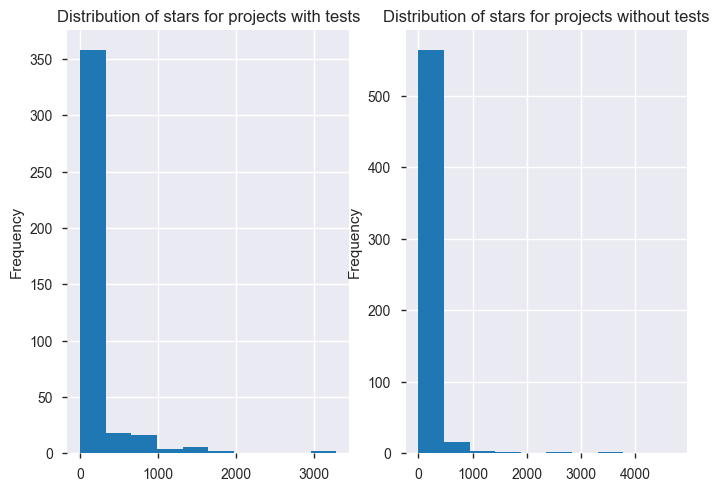

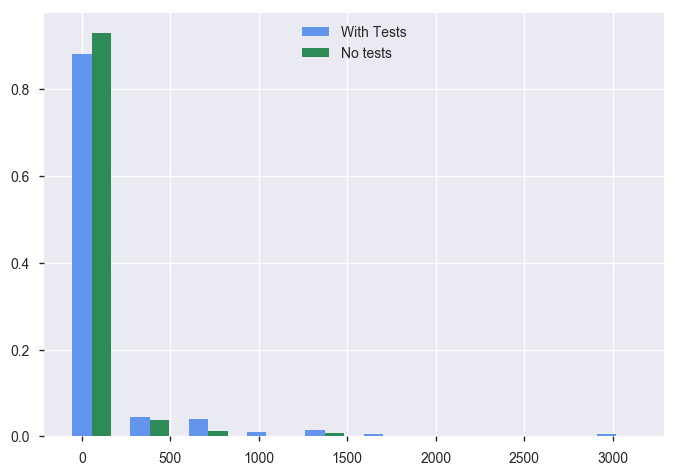

In [63]:
_,(ax1,ax2) = plt.subplots(1,2)
df_tmp[df_tmp['tests']]['stars'].plot.hist(ax=ax1)
ax1.set_title("Distribution of stars for projects with tests")
df_tmp[~df_tmp['tests']]['stars'].plot.hist(ax=ax2)
ax2.set_title("Distribution of stars for projects without tests")
plt.figure()

fig, ax = plt.subplots()

import numpy as np
a_heights, a_bins = np.histogram(df_tmp[df_tmp['tests']]['stars'])
b_heights, b_bins = np.histogram(df_tmp[~df_tmp['tests']]['stars'], bins=a_bins)

len_with_tests = len(df_tmp[df_tmp['tests']])
len_no_tests =len(df_tmp[~df_tmp['tests']]) 
a_heights = a_heights/len_with_tests
b_heights = b_heights/len_no_tests

width = (a_bins[1] - a_bins[0])/3

ax.bar(a_bins[:-1], a_heights, width=width, facecolor='cornflowerblue', label="With Tests")
ax.bar(b_bins[:-1]+width, b_heights, width=width, facecolor='seagreen', label='No tests')
ax.legend(loc='upper center', shadow=True)
pass

------
## Conjecture
----

This last histogram shows that most projects have a small number of stars. However, for projects with a bigger number of stars there are more projects with tests than without.

----

In [386]:
from statsmodels.graphics.boxplots import violinplot, beanplot

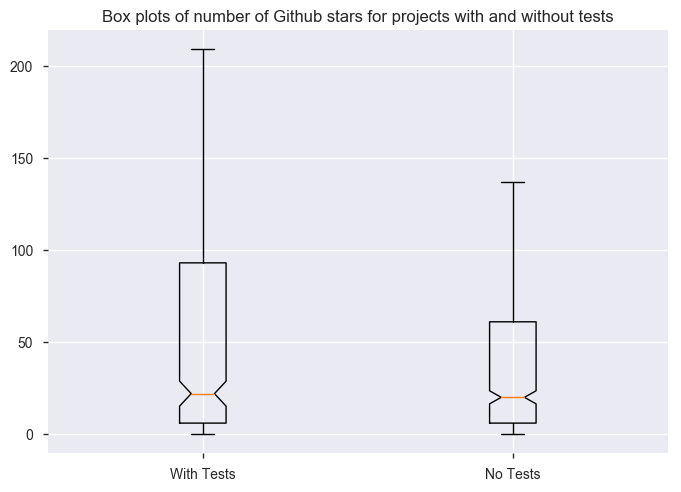

In [326]:
_,ax = plt.subplots()
ax.boxplot(
    [df_tmp[df_tmp['tests']]['stars'].values,df_tmp[~df_tmp['tests']]['stars'].values],
    labels=["With Tests", "No Tests"],
    notch=True,
    sym='',
    meanline =True,
)
ax.set_title("Box plots of number of Github stars for projects with and without tests")
# notches are calculated using a Gaussian-based asymptotic approximation
# (see McGill, R., Tukey, J.W., and Larsen, W.A., 1978, and Kendall and Stuart, 1967)

In [13]:
df_tmp = df[df['stars']<10000]
df_tmp[df_tmp['tests']][['stars','forks']].describe()

,stars,forks
count,406.000000,406.000000
mean,150.216749,54.514778
std,364.204219,144.958073
min,0.000000,0.000000
25%,6.000000,3.000000
50%,22.000000,9.000000
75%,93.000000,36.000000
max,3294.000000,1815.000000


In [14]:
df_tmp[~df_tmp['tests']][['stars','forks']].describe()

,stars,forks
count,593.000000,593.000000
mean,116.583474,42.158516
std,391.584433,122.692300
min,0.000000,0.000000
25%,6.000000,3.000000
50%,20.000000,9.000000
75%,61.000000,25.000000
max,4731.000000,1091.000000


### cobntributors

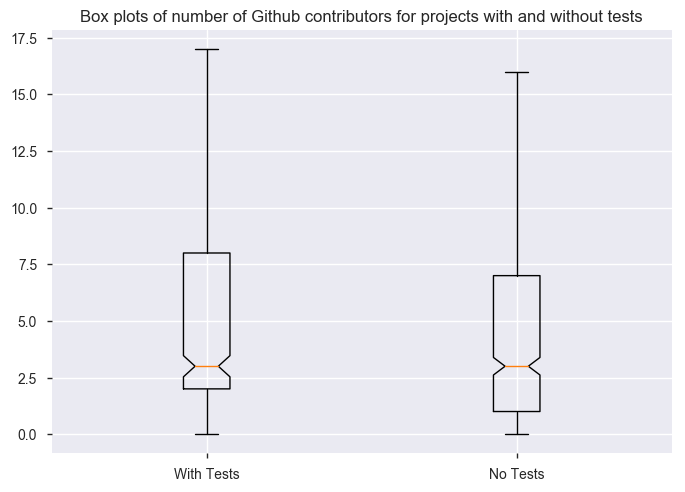

In [15]:
_,ax = plt.subplots()
ax.boxplot(
    [df_tmp[df_tmp['tests']]['contributors'].values,df_tmp[~df_tmp['tests']]['contributors'].values],
    labels=["With Tests", "No Tests"],
    notch=True,
    sym='',
    meanline =True,
)
ax.set_title("Box plots of number of Github contributors for projects with and without tests")
# notches are calculated using a Gaussian-based asymptotic approximation
# (see McGill, R., Tukey, J.W., and Larsen, W.A., 1978, and Kendall and Stuart, 1967)

### Activity/Contributions/Commits

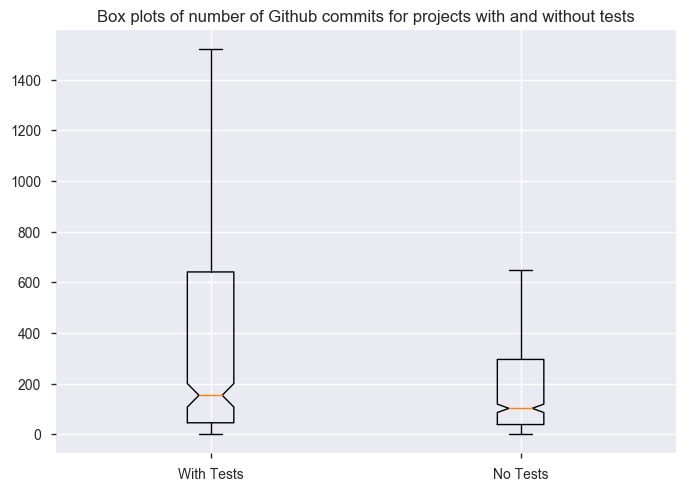

In [16]:
_,ax = plt.subplots()
ax.boxplot(
    [df_tmp[df_tmp['tests']]['commits'].values,df_tmp[~df_tmp['tests']]['commits'].values],
    labels=["With Tests", "No Tests"],
    notch=True,
    sym='',
    meanline =True,
)
ax.set_title("Box plots of number of Github commits for projects with and without tests")
# notches are calculated using a Gaussian-based asymptotic approximation
# (see McGill, R., Tukey, J.W., and Larsen, W.A., 1978, and Kendall and Stuart, 1967)

### Forks

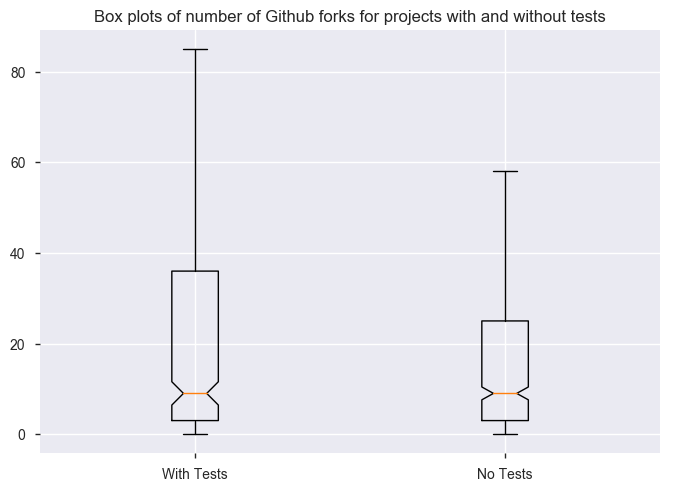

In [17]:
_,ax = plt.subplots()
ax.boxplot(
    [df_tmp[df_tmp['tests']]['forks'].values,df_tmp[~df_tmp['tests']]['forks'].values],
    labels=["With Tests", "No Tests"],
    notch=True,
    sym='',
    meanline =True,
)
ax.set_title("Box plots of number of Github forks for projects with and without tests")
# notches are calculated using a Gaussian-based asymptotic approximation
# (see McGill, R., Tukey, J.W., and Larsen, W.A., 1978, and Kendall and Stuart, 1967)

# Analysis of the impact of having tests in a project

## Stars vs UI Tests

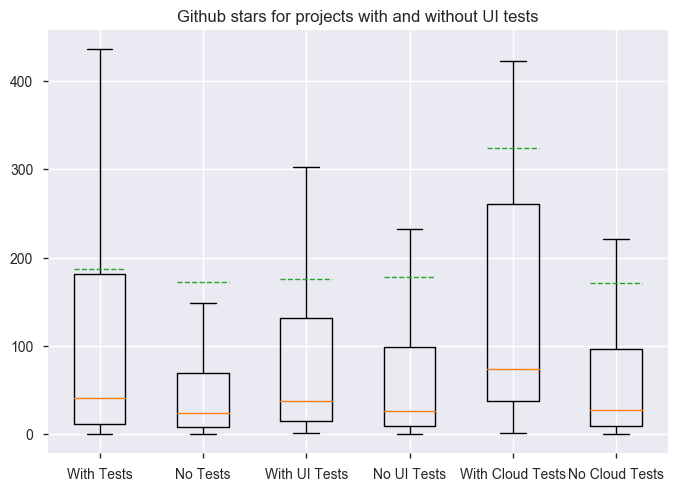

In [274]:
_,ax = plt.subplots()
ax.boxplot(
    [
        df_tmp[df_tmp['tests']]['stars'].values,
        df_tmp[~df_tmp['tests']]['stars'].values,
        df_tmp[df_tmp['ui_tests']]['stars'].values,
        df_tmp[~df_tmp['ui_tests']]['stars'].values,
        df_tmp[df_tmp['cloud_tests']]['stars'].values,
        df_tmp[~df_tmp['cloud_tests']]['stars'].values,
    ],
    labels=[
        "With Tests",
        "No Tests",
        "With UI Tests",
        "No UI Tests",
        "With Cloud Tests",
        "No Cloud Tests",
    ],
    notch=False,
    sym='',
    meanline =True,
    showmeans=True,
)
ax.set_title("Github stars for projects with and without UI tests")
# notches are calculated using a Gaussian-based asymptotic approximation
# (see McGill, R., Tukey, J.W., and Larsen, W.A., 1978, and Kendall and Stuart, 1967)

## Contributors vs UI Tests

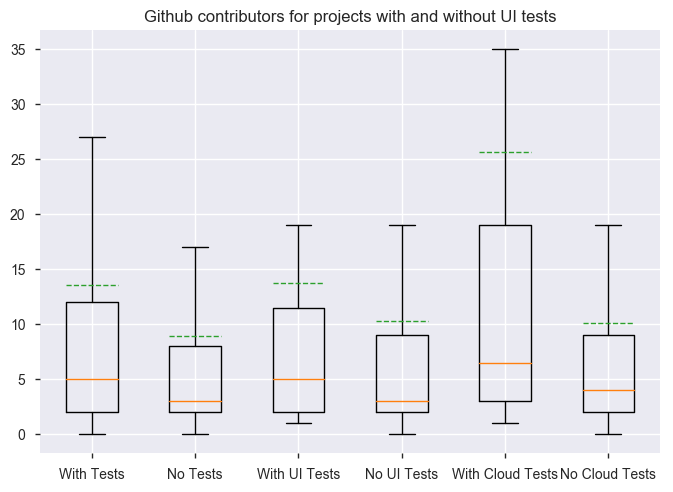

In [273]:
_,ax = plt.subplots()
ax.boxplot(
    [
        df_tmp[df_tmp['tests']]['contributors'].values,
        df_tmp[~df_tmp['tests']]['contributors'].values,
        df_tmp[df_tmp['ui_tests']]['contributors'].values,
        df_tmp[~df_tmp['ui_tests']]['contributors'].values,
        df_tmp[df_tmp['cloud_tests']]['contributors'].values,
        df_tmp[~df_tmp['cloud_tests']]['contributors'].values,
    ],
    labels=[
        "With Tests",
        "No Tests",
        "With UI Tests",
        "No UI Tests",
        "With Cloud Tests",
        "No Cloud Tests",
    ],
    notch=False,
    sym='',
    meanline=True,
    showmeans=True,
)
ax.set_title("Github contributors for projects with and without UI tests")
# notches are calculated using a Gaussian-based asymptotic approximation
# (see McGill, R., Tukey, J.W., and Larsen, W.A., 1978, and Kendall and Stuart, 1967)

----
# Conjecture

----

Projects that have tests have more contributors. This suggests that in order to get developers engaged to a project and willing to contribute, it is important that the project has tests.

## Commits vs Tests


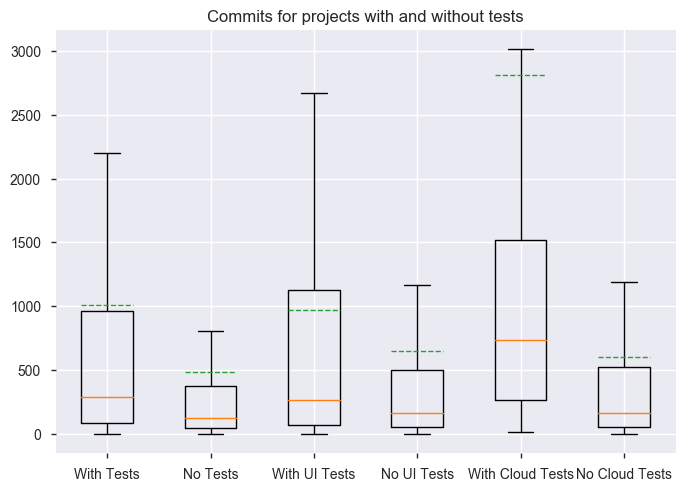

In [269]:
_,ax = plt.subplots()
ax.boxplot(
    [
        df_tmp[df_tmp['tests']]['commits'].values,
        df_tmp[~df_tmp['tests']]['commits'].values,
        df_tmp[df_tmp['ui_tests']]['commits'].values,
        df_tmp[~df_tmp['ui_tests']]['commits'].values,
        df_tmp[df_tmp['cloud_tests']]['commits'].values,
        df_tmp[~df_tmp['cloud_tests']]['commits'].values,
    ],
    labels=[
        "With Tests",
        "No Tests",
        "With UI Tests",
        "No UI Tests",
        "With Cloud Tests",
        "No Cloud Tests",
    ],
    notch=False,
    sym='',
    meanline =True,
    showmeans=True,
)
ax.set_title("Commits for projects with and without tests")

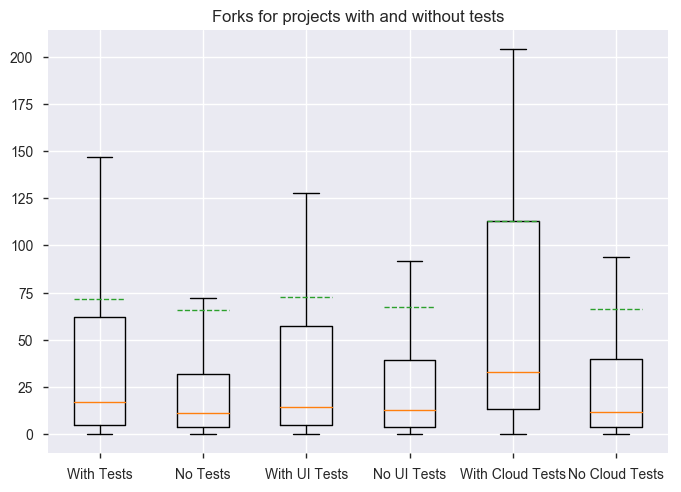

In [268]:
_,ax = plt.subplots()
ax.boxplot(
    [
        df_tmp[df_tmp['tests']]['forks'].values,
        df_tmp[~df_tmp['tests']]['forks'].values,
        df_tmp[df_tmp['ui_tests']]['forks'].values,
        df_tmp[~df_tmp['ui_tests']]['forks'].values,
        df_tmp[df_tmp['cloud_tests']]['forks'].values,
        df_tmp[~df_tmp['cloud_tests']]['forks'].values,
    ],
    labels=[
        "With Tests",
        "No Tests",
        "With UI Tests",
        "No UI Tests",
        "With Cloud Tests",
        "No Cloud Tests",
    ],
    notch=False,
    sym='',
    meanline =True,
    showmeans=True,
)
ax.set_title("Forks for projects with and without tests")

# Analyze popular projects without tests

In [21]:
df_tmp[~df_tmp['tests']].sort_values('stars', ascending=False)

,last_updated,github_link,user,project_name,app_id,category,stars,contributors,commits,forks,created_at,androidviewclient,appium,calabash,espresso,monkeyrunner,pythonuiautomator,robotium,uiautomator,projectquantum,qmetry,saucelabs,firebase,perfecto,bitbar,junit,androidjunitrunner,roboelectric,robospock,rating_value,rating_count,downloads,tests,ui_tests,cloud_tests
290,2017-05-20,https://github.com/samuelclay/NewsBlur,samuelclay,NewsBlur,com.newsblur,Reading,4731,66,11832,860,2009-01-05,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,3.797177,1346.0,"50,000 - 100,000",False,False,False
896,2015-11-17,https://github.com/dolphin-emu/dolphin,dolphin-emu,dolphin,org.dolphinemu.dolphinemu,Games,3662,294,25821,920,2013-07-22,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,NaN,NaN,NaN,False,False,False
602,2016-11-02,https://github.com/naman14/Timber,naman14,Timber,naman14.timber,Multimedia,3391,26,467,1031,2015-06-12,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,4.313753,2894.0,"100,000 - 500,000",False,False,False
898,2015-11-15,https://github.com/hrydgard/ppsspp,hrydgard,ppsspp,org.ppsspp.ppsspp,Games,3085,207,22653,1091,2012-11-01,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,4.243116,853698.0,"10,000,000 - 50,000,000",False,False,False
517,2016-12-30,https://github.com/minetest/minetest,minetest,minetest,net.minetest.minetest,Games,2742,322,6957,822,2011-08-07,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,3.629015,2771.0,"100,000 - 500,000",False,False,False
15,2017-08-24,https://github.com/siacs/Conversations,siacs,Conversations,eu.siacs.conversations,Internet,2535,87,4311,834,2014-01-24,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,4.497098,1034.0,"10,000 - 50,000",False,False,False
393,2017-03-26,https://github.com/jonan/ForkHub,jonan,ForkHub,jp.forkhub,Development,2159,94,2831,166,2014-10-16,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,4.413389,1195.0,"50,000 - 100,000",False,False,False
165,2017-07-18,https://github.com/jackpal/Android-Terminal-Em...,jackpal,Android-Terminal-Emulator,jackpal.androidterm,Development,1624,65,1038,653,2010-09-04,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,4.395605,111217.0,"10,000,000 - 50,000,000",False,False,False
304,2017-05-15,https://github.com/redsolution/xabber-android,redsolution,xabber-android,com.xabber.androiddev,Internet,1484,14,2022,792,2013-01-29,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,NaN,NaN,NaN,False,False,False
167,2017-07-18,https://github.com/arpitkh96/AmazeFileManager,arpitkh96,AmazeFileManager,com.amaze.filemanager,System,1416,71,2288,479,2014-07-14,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,4.339896,9447.0,"500,000 - 1,000,000",False,False,False


In [22]:
df[df['tests']]

,last_updated,github_link,user,project_name,app_id,category,stars,contributors,commits,forks,created_at,androidviewclient,appium,calabash,espresso,monkeyrunner,pythonuiautomator,robotium,uiautomator,projectquantum,qmetry,saucelabs,firebase,perfecto,bitbar,junit,androidjunitrunner,roboelectric,robospock,rating_value,rating_count,downloads,tests,ui_tests,cloud_tests
1,2017-08-28,https://github.com/subchannel13/EnchantedFortress,subchannel13,EnchantedFortress,hr.kravarscan.enchantedfortress,Games,12,2,73,3,2017-05-21,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,True,False,False,NaN,NaN,NaN,True,True,False
4,2017-08-28,https://github.com/hwki/SimpleBitcoinWidget,hwki,SimpleBitcoinWidget,com.brentpanther.litecoinwidget,Money,28,5,81,23,2013-03-24,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,True,False,False,4.481482,27.0,"1,000 - 5,000",True,True,False
5,2017-08-28,https://github.com/hwki/SimpleBitcoinWidget,hwki,SimpleBitcoinWidget,com.brentpanther.ethereumwidget,Money,28,5,81,23,2013-03-24,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,True,False,False,4.342105,76.0,"5,000 - 10,000",True,True,False
6,2017-08-28,https://github.com/hwki/SimpleBitcoinWidget,hwki,SimpleBitcoinWidget,com.brentpanther.bitcoinwidget,Money,28,5,81,23,2013-03-24,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,True,False,False,4.441176,918.0,"50,000 - 100,000",True,True,False
7,2017-08-28,https://github.com/hwki/SimpleBitcoinWidget,hwki,SimpleBitcoinWidget,com.brentpanther.bitcoincashwidget,Money,28,5,81,23,2013-03-24,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,True,False,False,4.666667,6.0,100 - 500,True,True,False
8,2017-08-28,https://github.com/gstraube/cythara,gstraube,cythara,com.github.cythara,Multimedia,6,1,135,0,2017-05-17,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,True,False,False,NaN,NaN,NaN,True,True,False
9,2017-08-28,https://github.com/ZeeRooo/MaterialFBook,ZeeRooo,MaterialFBook,me.zeeroooo.materialfb,Internet,63,5,82,28,2016-09-12,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,True,False,False,NaN,NaN,NaN,True,True,False
10,2017-08-28,https://github.com/PaulWoitaschek/Voice,PaulWoitaschek,Voice,de.ph1b.audiobook,Multimedia,788,17,3270,179,2014-08-02,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False,4.372669,2949.0,"100,000 - 500,000",True,False,False
16,2017-08-24,https://github.com/rignaneseleo/SlimSocial-for...,rignaneseleo,SlimSocial-for-Facebook,it.rignanese.leo.slimfacebook,Internet,61,8,138,34,2015-11-11,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,4.262704,4408.0,"100,000 - 500,000",True,False,False
18,2017-08-24,https://github.com/gsantner/kimai-android,gsantner,kimai-android,de.live.gdev.timetracker,Internet,17,6,66,10,2014-02-28,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,3.666667,24.0,"1,000 - 5,000",True,False,False


## Google Play Rating

In [277]:
df_with_google_data = df[~df["rating_count"].isnull()]

In [278]:
len(df_with_google_data)


638

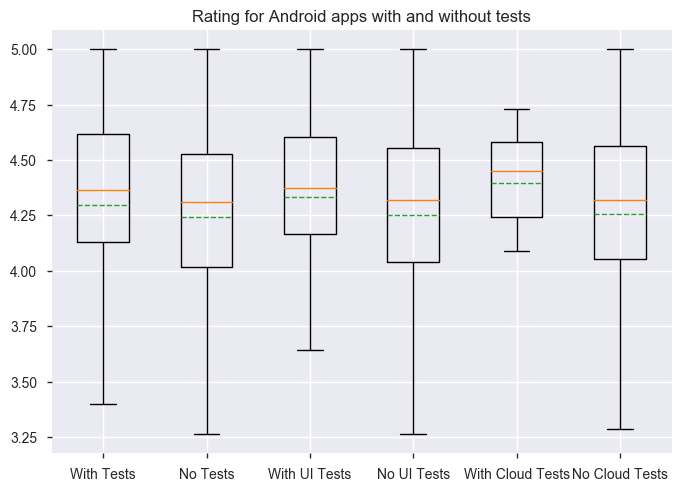

In [279]:
_,ax = plt.subplots()
ax.boxplot(
    [
        df_with_google_data[df_with_google_data['tests']]['rating_value'].values,
        df_with_google_data[~df_with_google_data['tests']]['rating_value'].values,
        df_with_google_data[df_with_google_data['ui_tests']]['rating_value'].values,
        df_with_google_data[~df_with_google_data['ui_tests']]['rating_value'].values,
        df_with_google_data[df_with_google_data['cloud_tests']]['rating_value'].values,
        df_with_google_data[~df_with_google_data['cloud_tests']]['rating_value'].values,
    ],
    labels=[
        "With Tests",
        "No Tests",
        "With UI Tests",
        "No UI Tests",
        "With Cloud Tests",
        "No Cloud Tests",
    ],
    sym='',
    meanline =True,
    showmeans=True
)
ax.set_title("Rating for Android apps with and without tests")
# notches are calculated using a Gaussian-based asymptotic approximation
# (see McGill, R., Tukey, J.W., and Larsen, W.A., 1978, and Kendall and Stuart, 1967)

In [280]:
from scipy.stats import mannwhitneyu

def compare_two_populations(a,b, label_a, label_b):
    print("{}: N={}, Avg={:.3f}, std={:.3f}".format(label_a, a.count(), a.mean(), a.std()))
    print("{}: N={}, Avg={:.3f}, std={:.3f}".format(label_b, b.count(), b.mean(), b.std()))
    print(mannwhitneyu(a, b))

In [281]:
df_with_tests = df_with_google_data[df_with_google_data['tests']]
df_without_tests = df_with_google_data[~df_with_google_data['tests']]


compare_two_populations(df_with_tests['rating_value'], df_without_tests['rating_value'],
                        "With tests", "Without tests")

With tests: N=250, Avg=4.295, std=0.480
Without tests: N=388, Avg=4.242, std=0.472
MannwhitneyuResult(statistic=43873.0, pvalue=0.020881059048314152)


In [282]:
a = df_with_tests[df_with_tests['rating_count']>6000]
b = df_without_tests[df_without_tests['rating_count']>6000]
compare_two_populations(a['rating_value'], b['rating_value'],
                        "With tests", "Without tests")

With tests: N=27, Avg=4.376, std=0.288
Without tests: N=41, Avg=4.277, std=0.246
MannwhitneyuResult(statistic=397.0, pvalue=0.02527291541281565)


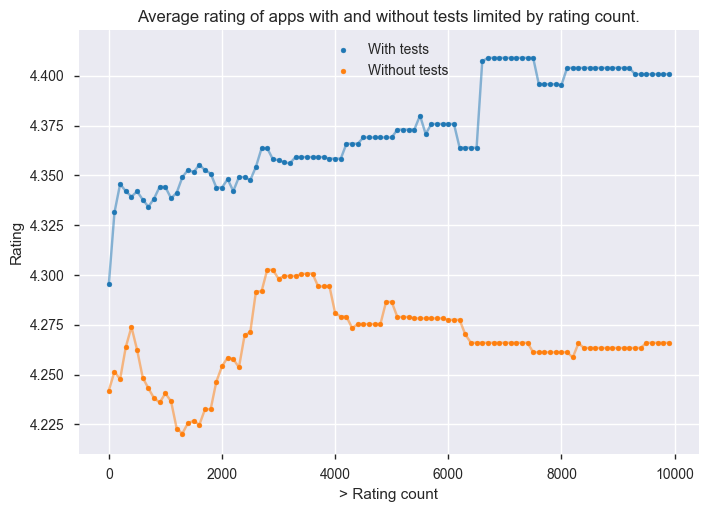

In [295]:
x = range(0, 10000 , 100)
y_with_tests = tuple(df_with_tests[df_with_tests['rating_count']>i]['rating_value'].mean() for i in x)
y_without_tests = tuple(df_without_tests[df_without_tests['rating_count']>i]['rating_value'].mean() for i in x)

#plt.plot(x, portions, label=label)
_,ax = plt.subplots()
ax.scatter(x, y_with_tests, marker='.', label="With tests")
ax.plot(x, y_with_tests, alpha=0.5)
ax.scatter(x, y_without_tests, marker='.', label="Without tests")
ax.plot(x, y_without_tests, alpha=0.5)
ax.legend(loc='upper center')

ax.set_title("Average rating of apps with and without tests limited by rating count.")
ax.set_ylabel("Rating")
ax.set_xlabel("> Rating count")
pass


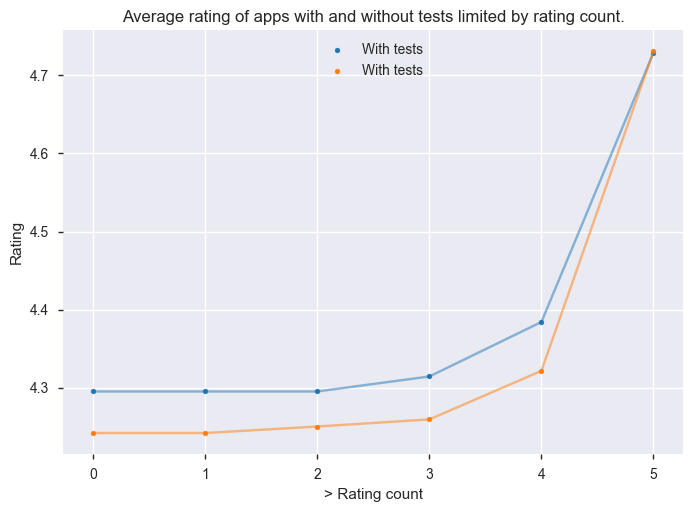

In [293]:

x = range(0, 6 , 1)
y_with_tests = tuple(df_with_tests[df_with_tests['rating_value'].round()>=i]['rating_value'].mean() for i in x)
y_without_tests = tuple(df_without_tests[df_without_tests['rating_value'].round()>=i]['rating_value'].mean() for i in x)


#plt.plot(x, portions, label=label)
_,ax = plt.subplots()
ax.scatter(x, y_with_tests, marker='.', label="With tests")
ax.plot(x, y_with_tests, alpha=0.5)
ax.scatter(x, y_without_tests, marker='.', label="With tests")
ax.plot(x, y_without_tests, alpha=0.5)
ax.legend(loc='upper center')

ax.set_title("Average rating of apps with and without tests limited by rating count.")
ax.set_ylabel("Rating")
ax.set_xlabel("> Rating count")
pass


Albeit the impact of the tests on rating is small. This impact grows as long as the nmber of ratings in the project increases.

In [224]:
set(df_with_google_data['downloads'])
downloads_scale = [
 '1 - 5',
 '10 - 50',
 '50 - 100',
 '100 - 500',
 '500 - 1,000',
 '1,000 - 5,000',
 '5,000 - 10,000',
 '10,000 - 50,000',
 '50,000 - 100,000',
 '100,000 - 500,000',
 '500,000 - 1,000,000',
 '1,000,000 - 5,000,000',
 '5,000,000 - 10,000,000',
 '10,000,000 - 50,000,000',
 '50,000,000 - 100,000,000',
 '100,000,000 - 500,000,000',
 '500,000,000 - 1,000,000,000',
 '1,000,000,000 - 5,000,000,000',
 '5,000,000,000 - 10,000,000,000',
]

In [230]:
df["downloads"] = df["downloads"].astype("category", categories=downloads_scale, ordered=True)

In [236]:
df["downloads"].describe()

count                 638
unique                 17
top       10,000 - 50,000
freq                  146
Name: downloads, dtype: object

In [243]:
{
    'min': df_with_google_data["downloads"].min(),
    "max": df_with_google_data["downloads"].max(),
    "max": df_with_google_data["downloads"].mode(),
}

{'max': 0    10,000 - 50,000
 Name: downloads, dtype: category
 Categories (19, object): [1 - 5 < 10 - 50 < 50 - 100 < 100 - 500 ... 100,000,000 - 500,000,000 < 500,000,000 - 1,000,000,000 < 1,000,000,000 - 5,000,000,000 < 5,000,000,000 - 10,000,000,000],
 'min': '1 - 5'}

In [254]:
df_with_google_data["downloads"].mode()

0    10,000 - 50,000
Name: downloads, dtype: category
Categories (19, object): [1 - 5 < 10 - 50 < 50 - 100 < 100 - 500 ... 100,000,000 - 500,000,000 < 500,000,000 - 1,000,000,000 < 1,000,000,000 - 5,000,000,000 < 5,000,000,000 - 10,000,000,000]

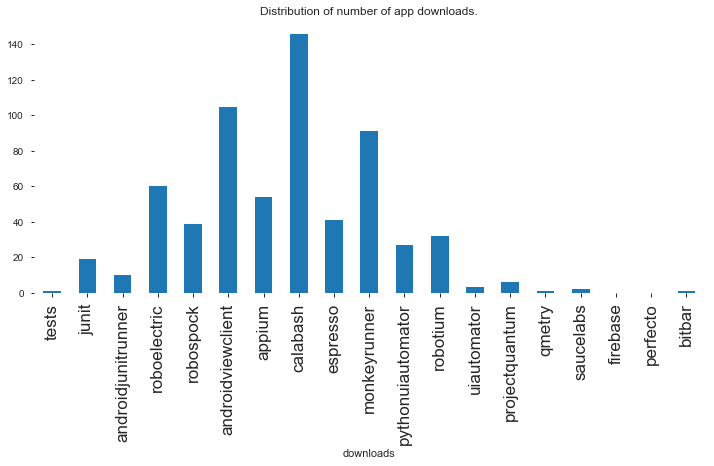

In [255]:
downloads_distribution = df_with_google_data.groupby('downloads')['downloads'].count()
ax = downloads_distribution.plot.bar()
ax.set_title("Distribution of number of app downloads.")
ax.set_xticklabels(labels, fontsize=17)


In [256]:
x = range(len(downloads_scale))
y_with_tests = tuple(df_with_tests[df_with_tests['downloads'].apply(lambda value: value in downloads_scale[i:])]['rating_value'].mean() for i in x)
y_without_tests = tuple(df_without_tests[df_without_tests['downloads'].apply(lambda value: value in downloads_scale[i:])]['rating_value'].mean() for i in x)
#y_without_tests = tuple(df_without_tests[df_without_tests['downloads'] in downloads_scale[i:]]['rating_value'].mean() for i in x)
#HACKS
remove_last = 4
y_with_tests = y_with_tests[:-remove_last]
y_without_tests = y_without_tests[:-remove_last]
x = x[:-remove_last]
#plt.plot(x, portions, label=label)
_,ax = plt.subplots()
ax.scatter(x, y_with_tests, marker='.', label="With tests")
ax.plot(x, y_with_tests, alpha=0.5)
ax.scatter(x, y_without_tests, marker='.', label="With tests")
ax.plot(x, y_without_tests, alpha=0.5)
ax.legend(loc='upper center')
ax.set_xticks(x)
x_labels = tuple(">="+name[:name.index(' -')] for name in downloads_scale)
ax.set_xticklabels(x_labels,rotation='vertical')
ax.set_title("Average rating of apps with and without tests limited by number of downloads.")
ax.set_ylabel("Rating")
ax.set_xlabel("Number of downloads")
pass


NameError: name 'df_with_tests' is not defined

----
# Conjecture
----

Projects with tests are have significantly higher rating:
MannwhitneyuResult(statistic=43873.0, pvalue=0.020881059048314152).
The plot above shows the mean average ratings for apps with at least a given number of downloads (given by xx axis).
It reveals that in apps with more than 10M users this difference is more evident.

Apps without tests are **more affected by corner cases** that are not being tested before deployment.

----

In [274]:
x = range(len(downloads_scale))
y_with_tests = tuple(df_with_tests[df_with_tests['downloads'].apply(lambda value: value in downloads_scale[i:])]['rating_value'].mean() for i in x)
y_without_tests = tuple(df_without_tests[df_without_tests['downloads'].apply(lambda value: value in downloads_scale[i:])]['rating_value'].mean() for i in x)
#y_without_tests = tuple(df_without_tests[df_without_tests['downloads'] in downloads_scale[i:]]['rating_value'].mean() for i in x)
#HACKS
remove_last = 4
y_with_tests = y_with_tests[:-remove_last]
y_without_tests = y_without_tests[:-remove_last]
x = x[:-remove_last]
#plt.plot(x, portions, label=label)
_,ax = plt.subplots()
ax.scatter(x, y_with_tests, marker='.', label="With tests")
ax.plot(x, y_with_tests, alpha=0.5)
ax.scatter(x, y_without_tests, marker='.', label="With tests")
ax.plot(x, y_without_tests, alpha=0.5)
ax.legend(loc='upper center')
ax.set_xticks(x)
x_labels = tuple(">="+name[:name.index(' -')] for name in downloads_scale)
ax.set_xticklabels(x_labels,rotation='vertical')
ax.set_title("Average rating of apps with and without tests limited by number of downloads.")
ax.set_ylabel("Rating")
ax.set_xlabel("Number of downloads")
pass


NameError: name 'df_with_tests' is not defined

In [31]:
df_with_ui_tests = df_with_google_data[df_with_google_data['ui_tests']]
df_without_ui_tests = df_with_google_data[~df_with_google_data['ui_tests']]

compare_two_populations(df_with_ui_tests['rating_value'], df_without_ui_tests['rating_value'],
                        "With UI tests", "Without UI tests")

With UI tests: N=90, Avg=4.333, std=0.406
Without UI tests: N=548, Avg=4.251, std=0.486
MannwhitneyuResult(statistic=22282.0, pvalue=0.071158181266160789)


In [32]:
df_with_cloud_tests = df_with_google_data[df_with_google_data['cloud_tests']]
df_without_cloud_tests = df_with_google_data[~df_with_google_data['cloud_tests']]

compare_two_populations(df_with_cloud_tests['rating_value'], df_without_cloud_tests['rating_value'],
                        "With Cloud tests", "Without Cloud tests")

With Cloud tests: N=26, Avg=4.397, std=0.241
Without Cloud tests: N=612, Avg=4.257, std=0.483
MannwhitneyuResult(statistic=6546.5, pvalue=0.062902337466449104)


# Coverage


In [31]:
df['coverage'] = df[['coveralls','codecov']].max(axis=1)

In [32]:
df['coverage'].count()

19

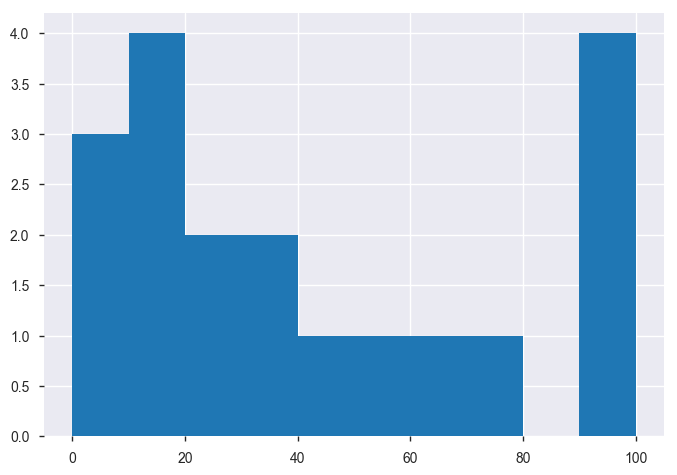

In [227]:
df['coverage'].hist(bins=range(0,101,10))

In [242]:
print ('Compare covarege with GPlay rating')
a = df[~df['coverage'].isnull() & df['tests']]
b = df[df['coverage'].isnull()]
compare_two_populations(a['rating_value'], b['rating_value'],
                        "With Coverage", "Without coverage")

Compare covarege with GPlay rating
With Coverage: N=13, Avg=4.399, std=0.259
Without coverage: N=624, Avg=4.260, std=0.479
MannwhitneyuResult(statistic=8296.0, pvalue=0.33033556107976209)


In [236]:
print ('Compare coverage with Github stars')
a = df[~df['coverage'].isnull() & df['tests']]
b = df[df['coverage'].isnull()]
compare_two_populations(a['stars'], b['stars'],
                        "With Coverage", "Without coverage")

Compare coverage with Github stars
With Coverage: N=18, Avg=432.056, std=448.928
Without coverage: N=981, Avg=124.715, std=377.525
MannwhitneyuResult(statistic=3421.0, pvalue=4.1158335637255078e-06)


----
# Conjecture
----

Only 19 projects are using a Coverage online service.
From these 19, only 4 have coverage above 80%.
Projects with coverage are more likely to be popular on Github. The difference of user's ratings on Google Play was not significant, due to the small number of apps using online coverage on google Play (N=12).  

----

In [33]:
df[df['coverage']>90]

,last_updated,github_link,user,project_name,app_id,category,stars,contributors,commits,forks,created_at,androidviewclient,appium,calabash,espresso,monkeyrunner,pythonuiautomator,robotium,uiautomator,projectquantum,qmetry,saucelabs,firebase,perfecto,bitbar,travis,circleci,codeship,codefresh,junit,androidjunitrunner,roboelectric,robospock,coveralls,codecov,rating_value,rating_count,downloads,tests,ui_tests,cloud_tests,age,age_numeric,time_since_last_update,time_since_last_update_numeric,coverage
75,2017-08-15,https://github.com/VREMSoftwareDevelopment/Wif...,VREMSoftwareDevelopment,WifiAnalyzer,com.vrem.wifianalyzer,Connectivity,352,10,935,133,2015-12-09,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,True,False,True,False,NaN,93.05842,4.406435,5595.0,"1,000,000 - 5,000,000",True,False,False,650 days 11:21:48.650637,1,35 days 11:21:48.650637,0,93.058420
183,2017-07-14,https://github.com/hidroh/materialistic,hidroh,materialistic,io.github.hidroh.materialistic,Internet,1352,8,1639,304,2015-01-22,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,True,False,91.139435,NaN,4.757817,1887.0,"50,000 - 100,000",True,False,False,971 days 11:21:48.650637,2,67 days 11:21:48.650637,0,91.139435
754,2016-05-27,https://github.com/k3b/CalendarIcsAdapter,k3b,CalendarIcsAdapter,de.k3b.android.calendar.ics.adapter,System,8,3,110,3,2014-03-21,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,True,False,NaN,94.03409,NaN,NaN,NaN,True,False,False,1278 days 11:21:48.650637,3,480 days 11:21:48.650637,1,94.034090
782,2016-04-29,https://github.com/nus-mtp/worldscope,nus-mtp,worldscope,com.litmus.worldscope,Multimedia,51,4,782,21,2015-08-28,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,True,False,False,94.926232,NaN,NaN,NaN,NaN,True,True,False,753 days 11:21:48.650637,2,508 days 11:21:48.650637,1,94.926232


# CI Services

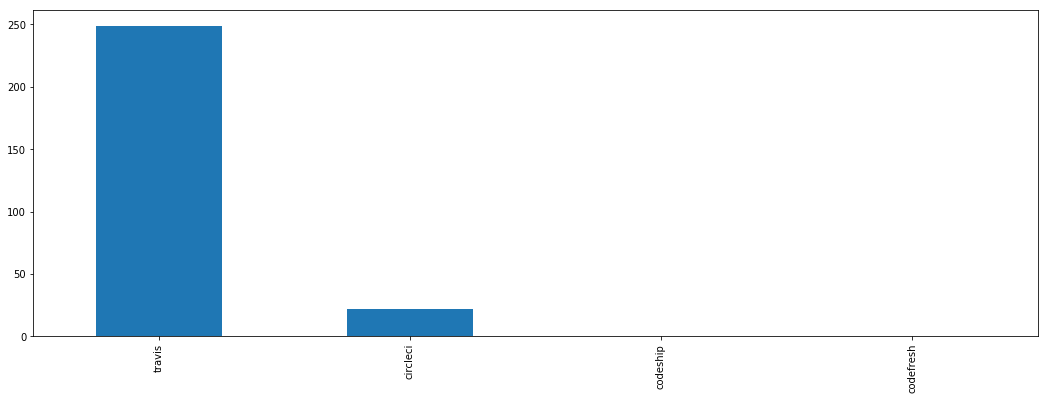

In [42]:
df[ci_services].sum().plot.bar(label='with tests')


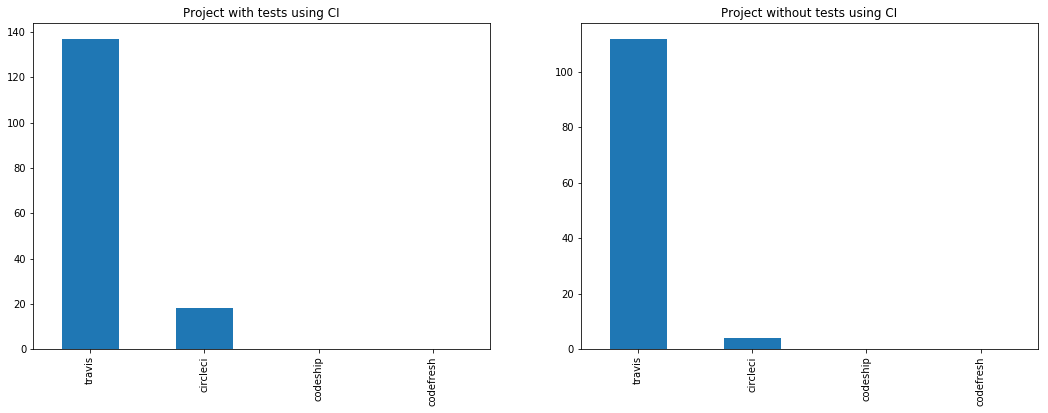

In [48]:
fig, (ax1, ax2) = plt.subplots(1, 2)
df[df['tests']][ci_services].sum().plot.bar(label='with tests', ax=ax1)
df[~df['tests']][ci_services].sum().plot.bar(label='no tests', ax=ax2)
ax1.set_title("Project with tests using CI")
ax2.set_title("Project without tests using CI")

In [63]:
count = (df['tests']&df[ci_services].any(axis=1)).sum()
print("Projects with tests using ci {}".format(count))
print("{:.1f}% of projects with tests".format(100*count/df['tests'].sum()))
print("{:.1f}% of total projects".format(100*count/len(df)))

Projects with tests using ci 147
36.2% of projects with tests
14.7% of total projects


In [64]:
count = (df['tests']&~df[ci_services].any(axis=1)).sum()
print("Projects with tests not using ci {}".format(count))
print("{:.1f}% of projects with tests".format(100*count/df['tests'].sum()))
print("{:.1f}% of total projects".format(100*count/len(df)))

Projects with tests not using ci 259
63.8% of projects with tests
25.9% of total projects


In [44]:

df[~df['tests'] & df[ci_services].any(axis=1)]

,last_updated,github_link,user,project_name,app_id,category,stars,contributors,commits,forks,created_at,androidviewclient,appium,calabash,espresso,monkeyrunner,pythonuiautomator,robotium,uiautomator,projectquantum,qmetry,saucelabs,firebase,perfecto,bitbar,travis,circleci,codeship,codefresh,junit,androidjunitrunner,roboelectric,robospock,coveralls,codecov,rating_value,rating_count,downloads,tests,ui_tests,cloud_tests,age,age_numeric,time_since_last_update,time_since_last_update_numeric,coverage
0,2017-08-28,https://github.com/yeriomin/YalpStore,yeriomin,YalpStore,com.github.yeriomin.yalpstore,System,354,9,796,27,2016-12-11,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,False,False,False,282 days 11:21:48.650637,0,22 days 11:21:48.650637,0,NaN
13,2017-08-26,https://github.com/greenaddress/GreenBits,greenaddress,GreenBits,com.greenaddress.greenbits_android_wallet.testnet,Money,40,12,1706,35,2015-01-21,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,NaN,NaN,4.500000,12.0,"500 - 1,000",False,False,False,972 days 11:21:48.650637,2,24 days 11:21:48.650637,0,NaN
14,2017-08-26,https://github.com/greenaddress/GreenBits,greenaddress,GreenBits,com.greenaddress.greenbits_android_wallet,Money,40,12,1706,35,2015-01-21,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,NaN,NaN,3.506550,229.0,"10,000 - 50,000",False,False,False,972 days 11:21:48.650637,2,24 days 11:21:48.650637,0,NaN
15,2017-08-24,https://github.com/siacs/Conversations,siacs,Conversations,eu.siacs.conversations,Internet,2535,87,4311,834,2014-01-24,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,NaN,NaN,4.497098,1034.0,"10,000 - 50,000",False,False,False,1334 days 11:21:48.650637,3,26 days 11:21:48.650637,0,NaN
30,2017-08-23,https://github.com/flocke/andOTP,flocke,andOTP,org.shadowice.flocke.andotp,Security,47,5,274,7,2017-07-05,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,False,False,False,76 days 11:21:48.650637,0,27 days 11:21:48.650637,0,NaN
32,2017-08-22,https://github.com/zoff99/ToxAndroidRefImpl,zoff99,ToxAndroidRefImpl,com.zoffcc.applications.trifa,Internet,19,1,383,2,2017-04-28,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,False,False,False,144 days 11:21:48.650637,0,28 days 11:21:48.650637,0,NaN
37,2017-08-22,https://github.com/oliexdev/openScale,oliexdev,openScale,com.health.openscale,Sports & Health,53,8,279,21,2014-12-13,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,NaN,NaN,4.244444,45.0,"5,000 - 10,000",False,False,False,1011 days 11:21:48.650637,2,28 days 11:21:48.650637,0,NaN
62,2017-08-20,https://github.com/nv95/OpenManga,nv95,OpenManga,org.nv95.openmanga,Reading,39,5,762,21,2015-10-05,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,False,False,False,715 days 11:21:48.650637,1,30 days 11:21:48.650637,0,NaN
64,2017-08-20,https://github.com/greenaddress/abcore,greenaddress,abcore,com.greenaddress.abcore,Money,22,3,186,14,2016-01-06,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,False,False,False,622 days 11:21:48.650637,1,30 days 11:21:48.650637,0,NaN
67,2017-08-15,https://github.com/vanilla-music/vanilla,vanilla-music,vanilla,ch.blinkenlights.android.vanilla,Multimedia,428,29,1849,173,2012-09-22,False,False,False,False,False,

## Conjecture

- Only 25% of projects are using continuous integration as part of their development process. This is very low considering that open source projects often rely on contributions. (github provides a descentralized and social coding context that encourages a pull-based development model. 
- The most used platform for continuous integration is Travis CI.
- Almost 50% of projects that use CI are not using it effectively, by including tests. In most cases continuous integration is there for the only purpose of checking whether the app builds successfully.
- Only 36% of projects with tests are using CI integration.

#### Implications

- There are 259 open source projects (26% of overall) that could potentially benefit from CI without requiring too much effort.
- Tools for Android should be easily configurable with Travis


This shows that mobile apps go against the main trend in which projects adopting Travis tend to have more automation tests (Fowler’s “good practices” proposal and zhao2017impact).